In [1]:
import ROOT as R
# import numpy as np
import math
import os
import numpy as np

Welcome to JupyROOT 6.22/00


In [2]:
R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.05)
R.gStyle.SetPadLeftMargin(0.15)

In [57]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data'
# DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/digi/'
files_in = [R.TFile(os.path.join(DIR_IN, name)) for name in ['bib_trk_hits_mcp_m1ns_p10mus.root']]
trees = [file_in.Get('tree') for file_in in files_in]

### Drawing the spatial hit occupancy: VXDB

In [19]:
R.gStyle.SetPalette(56)
R.gROOT.ForceStyle()
RNG = {'x': 70, 'y': 3.14}
NH = 3
histos = [R.TH2I('h{0:d}'.format(i), ';Z [mm];#phi [rad]', 140,-RNG['x'],RNG['x'], 380,-RNG['y'],RNG['y']) for i in range(NH)]
# Setting Canvas
C = R.TCanvas('canvas', '', 600, 800)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.12)
C.SetGrid(1,1)
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'

Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/pos_zphi_vxdb_l0.png has been created
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/pos_zphi_vxdb_l2.png has been created
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/pos_zphi_vxdb_l7.png has been created


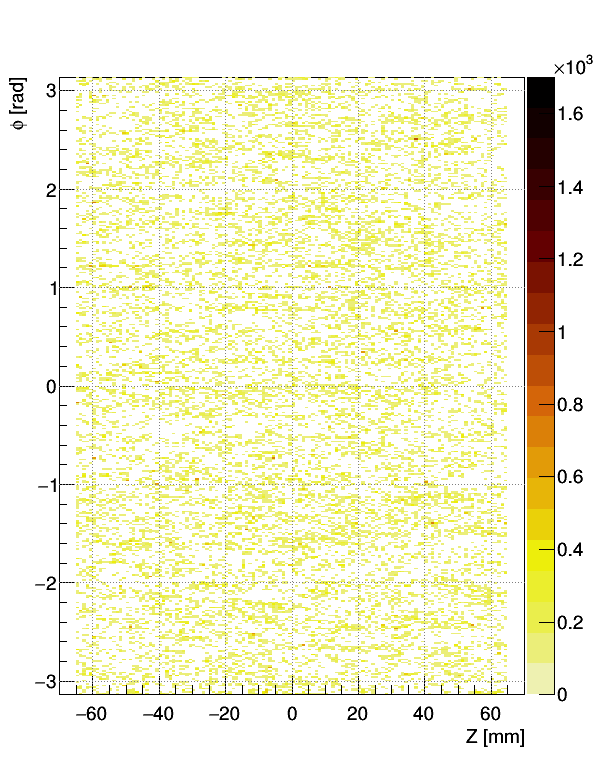

In [20]:
gsel = 'abs(time - time0) < 0.18 && col_id == 0'
sels = {
    'vxdb_l0': 'layer == 0',
    'vxdb_l2': 'layer == 2',
    'vxdb_l7': 'layer == 7',
}
for sel_name, sel in sels.items():
    trees[0].Draw('atan2(pos_y, pos_x):pos_z >> h0', sel+' && '+gsel)
    C.Clear()
    C.cd()
    leg = R.TLegend(0.4, 0.8, 0.95, 0.9)
    leg.SetNColumns(NH)
    h = histos[0].Clone()
    h.SetDirectory(0)
    h.Scale(100)
    h.GetZaxis().SetMaxDigits(3)
    h.SetAxisRange(0.0, 1.7e3, 'Z')
    h.Draw('colz')
    C.Draw()
    C.SaveAs(os.path.join(DIR_OUT, 'pos_zphi_'+sel_name+'.png'))

### Drawing the spatial hit occupancy: VXDE

In [91]:
R.gStyle.SetPalette(56)
R.gROOT.ForceStyle()
RNG = {'x': 120, 'y': 120}
NH = 1
histos = [R.TH2I('h{0:d}'.format(i), ';X [mm];Y [mm]', 240,-RNG['x'],RNG['x'], 240,-RNG['y'],RNG['y']) for i in range(NH)]
# Setting Canvas
C = R.TCanvas('canvas', '', 800, 800)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.12)
C.SetGrid(1,1)
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'

Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/pos_xy_vxde_l2_log.png has been created


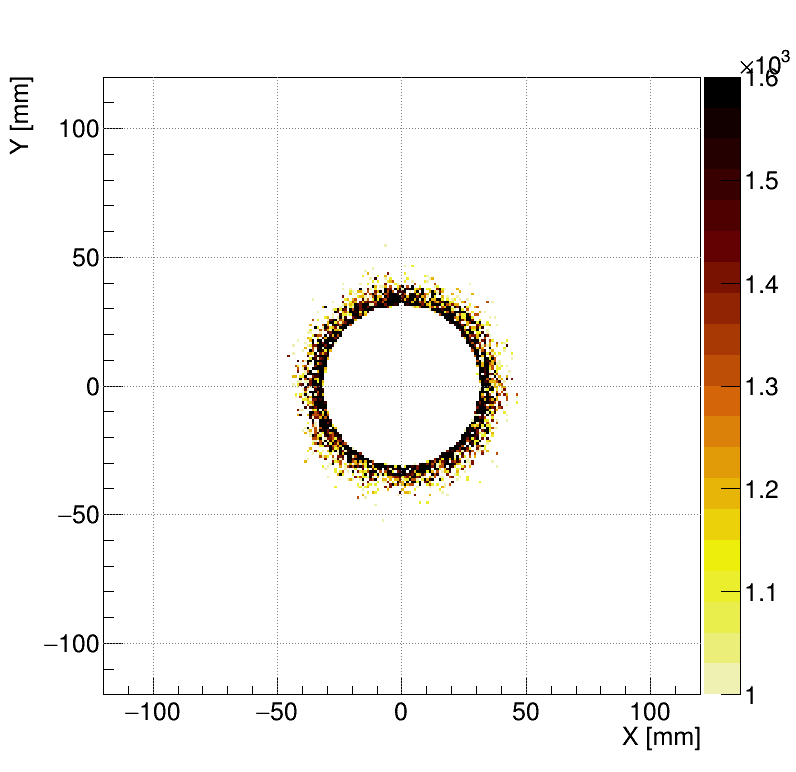

In [106]:
gsel = 'abs(time - time0) < 0.18 && col_id == 1 && side > 0'
sels = {
#     'vxde_l0': 'layer == 0',
    'vxde_l2': 'layer == 2',
#     'vxde_l7': 'layer == 7',
}
for sel_name, sel in sels.items():
    trees[0].Draw('pos_y:pos_x >> h0', sel+' && '+gsel)
    C.Clear()
    C.cd()
    leg = R.TLegend(0.4, 0.8, 0.95, 0.9)
    leg.SetNColumns(NH)
    h = histos[0].Clone()
    h.SetDirectory(0)
    h.Scale(100)
    h.GetZaxis().SetMaxDigits(3)
#     h.SetAxisRange(0.0, 2.7e3, 'Z')
    h.SetAxisRange(1e3, 1.6e3, 'Z')
    C.SetLogz(False)
    h.Draw('colz')
    C.Draw()
    C.SaveAs(os.path.join(DIR_OUT, 'pos_xy_'+sel_name+'_log.png'))

### Drawing the XY hit positions

In [118]:
R.gStyle.SetPalette(56)
R.gROOT.ForceStyle()
RNG = {'x': 150, 'y': 150}
NH = 1
histos = [R.TH2I('h{0:d}'.format(i), ';X [mm];Y [mm]', 1000,-RNG['x'],RNG['x'], 1000,-RNG['y'],RNG['y']) for i in range(NH)]
# Setting Canvas
C = R.TCanvas('canvas', '', 800, 800)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.12)
C.SetGrid(1,1)
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'

Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/pos_xy_vxdb_ib.png has been created


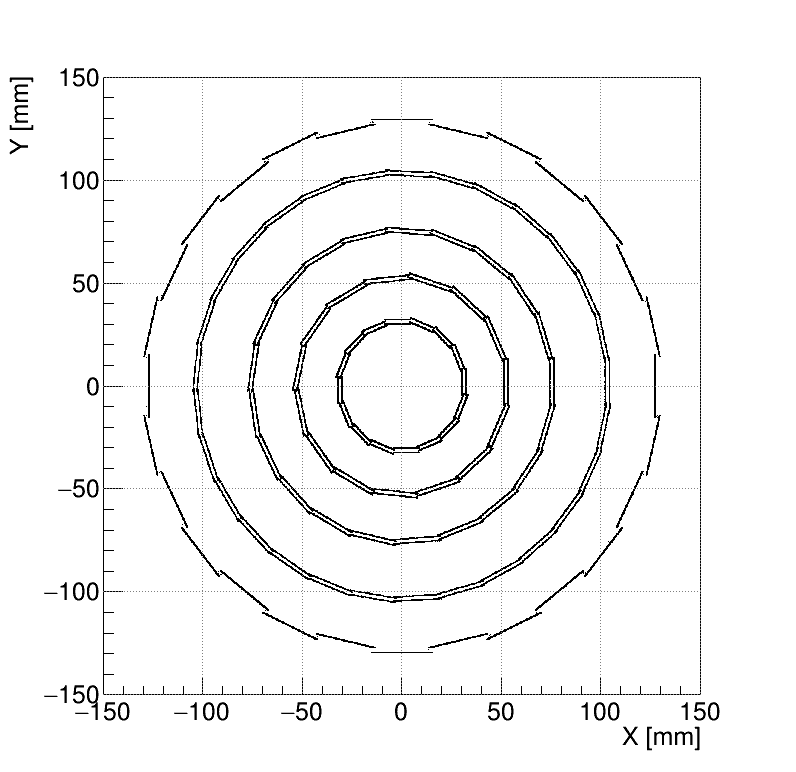

In [119]:
gsel = 'abs(time - time0) < 0.18'
sels = {
    'vxdb_ib': '(col_id == 0 || col_id == 2)',
}
for sel_name, sel in sels.items():
    trees[0].Draw('pos_y:pos_x >> h0', sel+' && '+gsel)
    C.Clear()
    C.cd()
    leg = R.TLegend(0.4, 0.8, 0.95, 0.9)
    leg.SetNColumns(NH)
    h = histos[0].Clone()
    h.SetDirectory(0)
#     h.SetMarkerStyle(1)
#     h.Scale(100)
    h.GetZaxis().SetMaxDigits(3)
#     h.SetAxisRange(0.0, 2.7e3, 'Z')
#     h.SetAxisRange(1e3, 1.6e3, 'Z')
    C.SetLogz(False)
    h.Draw('')
    C.Draw()
    C.SaveAs(os.path.join(DIR_OUT, 'pos_xy_'+sel_name+'.png'))

### Drawing the hit and MCParticle vertex positions

In [32]:
RNG = {'x': 300, 'y': 150}
NH = 3
histos = [R.TH2I('h{0:d}'.format(i), ';Z [mm];R [mm]', 200*RNG['x'],-RNG['x'],RNG['x'], 100*RNG['y'],0,RNG['y']) for i in range(NH)]
# Setting Canvas
C = R.TCanvas('canvas', '', 1200, 600)
R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.05)
C.SetGrid(1,1)
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'

Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/pos_rz_vxdb_l23.png has been created


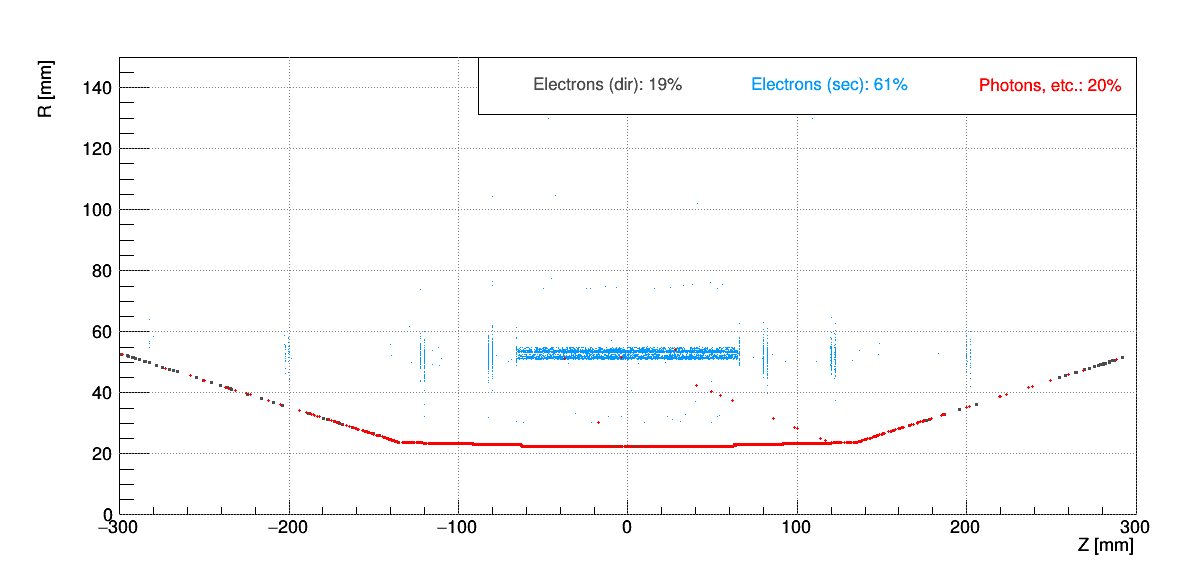

In [45]:
gsel = 'abs(time - time0) < 0.18'
sels = {
#     'vxdb_l01': 'col_id == 0 && layer <= 1',
    'vxdb_l23': 'col_id == 0 && (layer == 2 || layer == 3)',
#     'vxdb_l67': 'col_id == 0 && layer >= 6',
#     'vxde_l01': 'col_id == 1 && layer <= 1 && side == 1',
#     'vxde_l23': 'col_id == 1 && (layer == 2 || layer == 3) && side == 1',
#     'vxde_l67': 'col_id == 1 && layer >= 6 && side == 1',
}
# sels = {
#     'eb': 'col_id == 0',
#     'hb': 'col_id == 2',
# }
colors = [ 12, R.kAzure+7, 2]
markers = [7, 1, 6]
legs = ['Electrons (dir)', 'Electrons (sec)', 'Photons, etc.']
for iH, h in enumerate(histos):
    h.SetMarkerColor(colors[iH])
    h.SetMarkerStyle(markers[iH])
for sel_name, sel in sels.items():
#     trees[0].Draw('pos_r:pos_z >> h0', sel+' && '+gsel)
    trees[0].Draw('mcp_vtx_r:mcp_vtx_z >> h0', sel+' && abs(mcp_pdg) == 11 && mcp_bib_niters == 0 && '+gsel, 'goff')
    trees[0].Draw('mcp_vtx_r:mcp_vtx_z >> h1', sel+' && abs(mcp_pdg) == 11 && mcp_bib_niters > 0 && '+gsel, 'goff')
    trees[0].Draw('mcp_vtx_r:mcp_vtx_z >> h2', sel+' && abs(mcp_pdg) != 11 && '+gsel, 'goff')
    C.Clear()
    C.cd()
    leg = R.TLegend(0.4, 0.8, 0.95, 0.9)
    leg.SetNColumns(NH)
    n_total = sum([h.GetEntries() for h in histos])
    for iH, hId in enumerate([0,1,2]):
        drawopt = '' if iH == 0 else 'same'
        h = histos[hId]
#         if iH == 0:
#             h.SetAxisRange(-150, 150, 'X')
#             h.SetAxisRange(22, 24.0, 'Y')
        h.Draw(drawopt)
        leg.AddEntry(h, legs[hId] + ': {0:.0f}%'.format(h.GetEntries()/n_total*100), '').SetTextColor(colors[hId])
    leg.Draw()
    C.Draw()
    C.SaveAs(os.path.join(DIR_OUT, 'pos_rz_'+sel_name+'.png'))

### Drawing the particle momenta

In [59]:
RNG = {'x': 50}
NH = 3
histos = [R.TH1F('h{0:d}'.format(i), ';Momentum [MeV];Partiles', 200,0,RNG['x']) for i in range(NH)]
# Setting Canvas
C = R.TCanvas('canvas', '', 600, 600)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.12)
C.SetRightMargin(0.05)
C.SetGrid(1,1)
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


vxde_l45
29330
34910
42470


Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/mcp_p_bib_trk_vxde_l45.png has been created


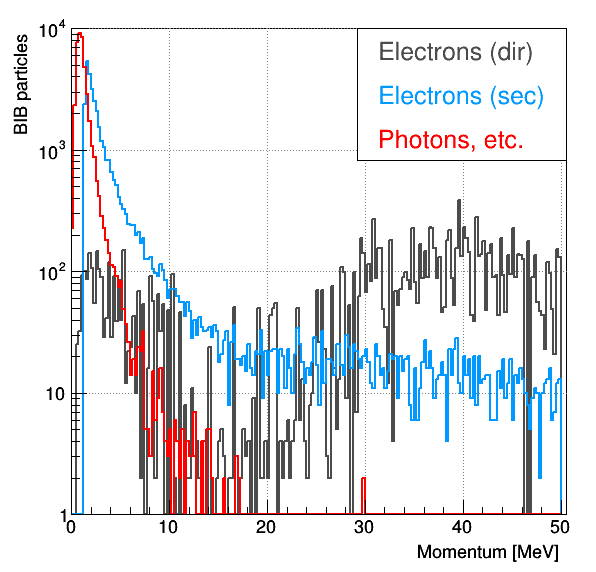

In [79]:
# gsel = 'abs(mcp_bib_pdg) == 11'
gsel = 'abs(time - time0) < 0.18'
sels = {
#     'electrons_40': 'abs(mcp_pdg) == 11 && layer == 1 && mcp_p*1e3 > 40.0',
#     'electrons_20': 'abs(mcp_pdg) == 11 && layer == 1 && mcp_p*1e3 > 20.0',
#     'electrons_10': 'abs(mcp_pdg) == 11 && layer == 1 && mcp_p*1e3 > 10.0',
#     'electrons_5': 'abs(mcp_pdg) == 11 && layer == 1 && mcp_p*1e3 > 5.0',
#     'electrons_0': 'abs(mcp_pdg) == 11 && layer == 1',
#     'all': 'layer == 1',
#     'vxdb_l01': 'col_id == 0 && layer <= 1',
#     'vxdb_l23': 'col_id == 0 && (layer == 2 || layer == 3)',
#     'vxde_l23': 'col_id == 1 && (layer == 2 || layer == 3) && side == 1',
    'vxde_l45': 'col_id == 1 && (layer == 4 || layer == 5) && side == 1',
#     'vxdb_l67': 'col_id == 0 && layer >= 6',
#     'vxde_l01': 'col_id == 1 && layer <= 1 && side == 1',
#     'vxde_l67': 'col_id == 1 && layer >= 6 && side == 1',
}
# colors = [12, R.kAzure+7, 2, R.kAzure+7, R.kTeal+2]
# legs = ['Vertex Detector', 'Inner Tracker', 'Outer Tracker']
colors = [ 12, R.kAzure+7, 2]
legs = ['Electrons (dir)', 'Electrons (sec)', 'Photons, etc.']
for iH, h in enumerate(histos):
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)

for sel_name, sel in sels.items():
    h_axis = R.TH1I('h_axis', ';Momentum [MeV];BIB particles', 100, 0, RNG['x'])
    h_axis.SetAxisRange(1, 1e4, 'Y')
    h_axis.SetAxisRange(0, 100, 'X')
    h_axis.GetXaxis().SetTitleOffset(1.2)
    h_axis.SetDirectory(0)
    # Drawing the tree
#     n_vb = trees[0].Draw('mcp_p*1e3 >> h0', '(col_id == 0) && (time - time0) > -0.18 && (time - time0) < 0.18 && '+sel)
#     n_ib = trees[0].Draw('mcp_p*1e3 >> h1', '(col_id == 2) && (time - time0) > -0.36 && (time - time0) < 1.36 && '+sel)
#     n_ob = trees[0].Draw('mcp_p*1e3 >> h2', '(col_id == 4) && (time - time0) > -0.36 && (time - time0) < 1.36 && '+sel)
#     print(sel_name, n_vb, n_ib, n_ob)
    print(sel_name)
    print(trees[0].Draw('mcp_p*1e3 >> h0', sel+'&& abs(mcp_pdg) == 11 && mcp_bib_niters == 0 && '+gsel, 'goff'))
    print(trees[0].Draw('mcp_p*1e3 >> h1', sel+'&& abs(mcp_pdg) == 11 && mcp_bib_niters > 0 && '+gsel, 'goff'))
    print(trees[0].Draw('mcp_p*1e3 >> h2', sel+'&& abs(mcp_pdg) != 11 && '+gsel, 'goff'))
    C.Clear()
    C.cd()
    leg = R.TLegend(0.6, 0.72, 0.95, 0.95)
#     leg.SetNColumns(NH)
    leg.SetMargin(0.1)
#     leg.SetFillStyle(0)
#     leg.SetBorderSize(0)
    h_axis.Draw('AXIS')
    h_axis.Draw('AXIG same')
    for iH, h in enumerate(histos):
#         h.Scale(1.0/h.GetEntries())
        h.Draw('HIST same')
        leg.AddEntry(h, legs[iH], '').SetTextColor(colors[iH])
    leg.Draw()
    C.SetLogy()
    C.RedrawAxis()
    C.Draw()
    C.SaveAs(os.path.join(DIR_OUT, 'mcp_p_bib_trk_'+sel_name+'.png'))

### Drawing the Hit Deposited Energy

In [4]:
RNG = {'x': 0.5}
NH = 3
histos = [R.TH1F('h{0:d}'.format(i), ';Deposited energy [KeV];Hits', 5000,0,RNG['x']) for i in range(NH)]
# Setting Canvas
C = R.TCanvas('canvas', '', 1200, 600)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.02)
C.SetGrid(1,1)
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'

In [5]:
x_elec = np.array([0.00010, 0.00011, 0.00013, 0.00014, 0.00015, 0.00017, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00029, 0.00032, 0.00035, 0.00038, 0.00042, 0.00046, 0.00050, 0.00055, 0.00060, 0.00066, 0.00072, 0.00079, 0.00087, 0.00095, 0.00105, 0.00115, 0.00126, 0.00138, 0.00151, 0.00166, 0.00182, 0.00200, 0.00219, 0.00240, 0.00263, 0.00288, 0.00316, 0.00347, 0.00380, 0.00417, 0.00457, 0.00501, 0.00550, 0.00603, 0.00661, 0.00724, 0.00794, 0.00871, 0.00955, 0.01047, 0.01148, 0.01259, 0.01380, 0.01514, 0.01660, 0.01820, 0.01995, 0.02188, 0.02399, 0.02630, 0.02884, 0.03162, 0.03467, 0.03802, 0.04169, 0.04571, 0.05012, 0.05495, 0.06026, 0.06607, 0.07244, 0.07943, 0.08710, 0.09550, 0.10471, 0.11482, 0.12589, 0.13804, 0.15136, 0.16596, 0.18197, 0.19953, 0.21878, 0.23988, 0.26303, 0.28840, 0.31623, 0.34674, 0.38019, 0.41687, 0.45709, 0.50119, 0.54954, 0.60256, 0.66069, 0.72444, 0.79433, 0.87096, 0.95499], dtype=np.float32)
y_elec = np.array([0.00000, 0.00003, 0.00010, 0.00023, 0.00041, 0.00064, 0.00092, 0.00125, 0.00163, 0.00207, 0.00255, 0.00309, 0.00368, 0.00455, 0.00542, 0.00628, 0.00715, 0.00803, 0.00895, 0.00988, 0.01081, 0.01178, 0.01282, 0.01387, 0.01491, 0.01606, 0.01732, 0.01857, 0.01983, 0.02109, 0.02234, 0.02360, 0.02488, 0.02630, 0.02775, 0.02919, 0.03064, 0.03214, 0.03368, 0.03522, 0.03675, 0.03829, 0.03984, 0.04142, 0.04300, 0.04459, 0.04616, 0.04771, 0.04927, 0.05082, 0.05232, 0.05375, 0.05519, 0.05663, 0.05806, 0.05950, 0.06094, 0.06235, 0.06360, 0.06483, 0.06605, 0.06728, 0.06838, 0.06940, 0.07042, 0.07143, 0.07245, 0.07344, 0.07425, 0.07505, 0.07584, 0.07657, 0.07718, 0.07779, 0.07840, 0.07886, 0.07917, 0.07948, 0.07980, 0.08011, 0.08042, 0.08074, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098, 0.08098], dtype=np.float32)
zeros = np.zeros(len(x_elec), dtype=np.float32)
g_elec = R.TGraphErrors(len(x_elec), x_elec, y_elec, zeros, zeros)

1228829.0 1228829


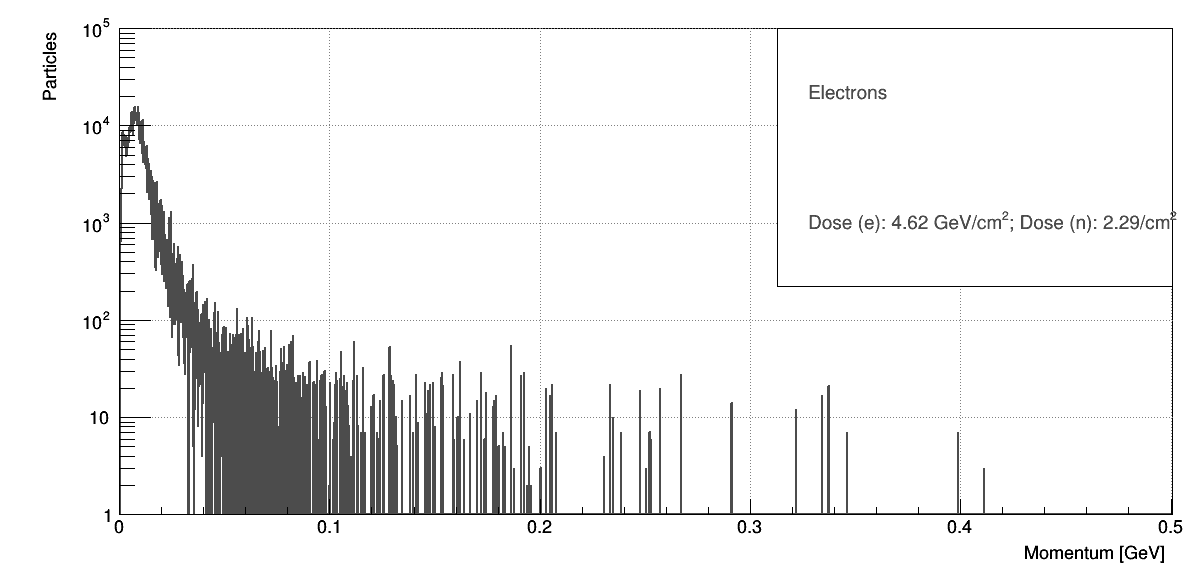

In [11]:
pdgIds = [11]
areas = [270.40, 8117.85, 140032.91]
area = areas[0]
colors = [12, R.kAzure+7, 2, R.kAzure+7, R.kTeal+2]
legs = ['Electrons', 'Protons', 'Pions']
for iH, h in enumerate(histos):
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
#     h.SetDirectory(0)
#     R.SetOwnership(h, False)

h_axis = R.TH1I('h_axis', ';Momentum [GeV];Particles', 1000, 0, RNG['x'])
h_axis.SetAxisRange(1, 1e5, 'Y')
h_axis.SetAxisRange(0, 500, 'X')
h_axis.GetXaxis().SetTitleOffset(1.2)
h_axis.SetDirectory(0)
C.Clear()
C.cd()
leg = R.TLegend(0.65, 0.5, 0.98, 0.95)
leg.SetMargin(0.08)
# leg.SetFillStyle(0)
# leg.SetBorderSize(0)
h_axis.Draw('AXIS')
h_axis.Draw('AXIG same')
for iP, pdgId in enumerate(pdgIds):
    # Drawing the tree
    nev = trees[0].Draw('mcp_p >> h{0:d}'.format(iP), 'layer == 0 && col_id == 0 && abs(mcp_pdg) == {0:d}'.format(pdgId), 'goff')
    h = histos[iP]
    print(h.GetEntries(), nev)
    h.Draw('HIST same')
    leg.AddEntry(h, legs[iP], '').SetTextColor(colors[iP])
    # Calculating the 1MeV neutron equivalent dose
    nBins = h.GetNbinsX()
    tot_dose = 0.0
    tot_energy = 0.0
    for iB in range(nBins):
        energy = h.GetBinCenter(iB+1)
        tot_energy += energy
        nparticles = h.GetBinContent(iB+1)
        tot_dose += energy * nparticles *g_elec.Eval(energy)
    leg.AddEntry(h, 'Dose (e): {0:.2f} GeV/cm^{{2}}; Dose (n): {1:.2f} GeV/cm^{{2}}'.format(tot_energy/area, tot_dose/area), '').SetTextColor(colors[iP])
leg.Draw()
C.SetLogy()
C.RedrawAxis()
C.Draw()

# C.SaveAs(os.path.join(DIR_OUT, 'trk_mcp_p.png'))

In [14]:
trees[0].Draw('edep*1e6', 'col_id == 0 && layer == 2', 'goff')

137640

In [120]:
3000*0.005

15.0

In [14]:
1.7/R.TMath.C() * 1e9 * (1.0 - 0.9945)

0.03118824290102693

In [126]:
R.TMath.C()

299792458.0

In [132]:
a = 67199105

In [136]:
print('{0:b}'.format(a))
print(a >> 7)
print((a >> 7) & 0b111111)

100000000010110000010000001
524993
1


In [148]:
print('{0:b}'.format(int(a/2**7)%2**6))

1


In [109]:
math.sqrt(1500**2 + 1150**2)

1890.10581714358

In [38]:
0.8 * 0.9945 * 0.3

0.23868

In [15]:
(3600.*24.*365.)*100000.*2.3 / 1e12

7.253279999999999

In [17]:
3600.*24.*365./1e7

3.1536

In [48]:
1.0/(0.3*3.56)

0.009363295880149813

In [85]:
1.0/(25e-4**2) * 0.01

1600.0

In [108]:
math.degrees(math.atan2(40, 120))

18.43494882292201

In [125]:
0.3/0.3

1.0

In [124]:
math.sqrt(280**2+100**2)

297.3213749463701

In [135]:
7.0/0.3

23.333333333333336